In [171]:
import random
import scipy
import math

import pandas as pd

import networkx as nx
import numpy as np
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import seaborn as sns

from networkx.algorithms.community import k_clique_communities
from networkx.algorithms.community import greedy_modularity_communities
from networkx.algorithms.community import louvain_communities, louvain_partitions

from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.metrics.cluster import mutual_info_score


plt.rcParams.update({
    "figure.facecolor":  (1.0, 1.0, 1.0, 1.0),  # red   with alpha = 30%
    "axes.facecolor":    (1.0, 1.0, 1.0, 1.0),  # green with alpha = 50%
    "savefig.facecolor": (1.0, 1.0, 1.0, 1.0),  # blue  with alpha = 20%
})

# Part 1: Centrality [30 points]

### 1.1

In [9]:
def load_graphs():
    """
    
    Returns:
    G_airport: NetworkX Graph Object
    G_yeast: NetworkX Graph Object
    
    """
    
    G_airport = nx.read_edgelist("US_airports.txt", data=(("weight", float),)).to_undirected()
    G_yeast = nx.read_edgelist("Yeast.txt", data=(("weight", float),)).to_undirected()

    
    return G_airport, G_yeast

In [10]:
a, y = load_graphs()

### 1.2

In [77]:
def inverse_largest_eigenvalue(G):
    # Calculate the adjacency matrix
    adj_matrix = nx.to_scipy_sparse_array(G)

    # Convert the adjacency matrix to a numpy array
    adj_array = adj_matrix.toarray()

    # Calculate the eigenvalues of the adjacency matrix
    eigenvalues = np.linalg.eigvals(adj_array)

    # Find the largest eigenvalue
    largest_eigenvalue = max(eigenvalues)

    # Find the inverse of the largest eigenvalue
    inverse_largest_eigenvalue = 1 / largest_eigenvalue

    return inverse_largest_eigenvalue.real

def drop_weights(G):
    '''Drop the weights from a networkx weighted graph.'''
    for node, edges in nx.to_dict_of_dicts(G).items():
        for edge, attrs in edges.items():
            attrs.pop('weight', None)


def top_10_nodes(G):
    """
    Inputs:
    G: NetworkX Graph Object
    
    Returns:
    top_10_nodes_dict: dict[list[int]]
    
    """
    
    eigen = nx.eigenvector_centrality(G)
    eigen = pd.DataFrame.from_dict(eigen, orient='index').reset_index().rename(columns={'index':'node', 0:'centrality'})
    eigen_top10 = list(eigen.nlargest(10, 'centrality')['node'].astype(int))
    
    katz_alpha = inverse_largest_eigenvalue(G)
    katz_alpha /= 10.
    
    katz = nx.katz_centrality(G, alpha=katz_alpha)
    katz = pd.DataFrame.from_dict(katz, orient='index').reset_index().rename(columns={'index':'node', 0:'centrality'})
    katz_top10 = list(katz.nlargest(10, 'centrality')['node'].astype(int))
    
    pr = nx.pagerank(G)
    pr = pd.DataFrame.from_dict(pr, orient='index').reset_index().rename(columns={'index':'node', 0:'centrality'})
    pr_top10 = list(pr.nlargest(10, 'centrality')['node'].astype(int))
    
    G_unweighted = G
    drop_weights(G_unweighted)

    cc = nx.closeness_centrality(G_unweighted)
    cc = pd.DataFrame.from_dict(cc, orient='index').reset_index().rename(columns={'index':'node', 0:'centrality'})
    cc_top10 = list(cc.nlargest(10, 'centrality')['node'].astype(int))
    
    hc = nx.harmonic_centrality(G_unweighted)
    hc = pd.DataFrame.from_dict(hc, orient='index').reset_index().rename(columns={'index':'node', 0:'centrality'})
    hc_top10 = list(hc.nlargest(10, 'centrality')['node'].astype(int))
    
    bc = nx.betweenness_centrality(G_unweighted)
    bc = pd.DataFrame.from_dict(bc, orient='index').reset_index().rename(columns={'index':'node', 0:'centrality'})
    bc_top10 = list(bc.nlargest(10, 'centrality')['node'].astype(int))
    
    top_10_nodes_dict = {
                    'eigen': eigen_top10,
                    'katz': katz_top10,
                    'page_rank': pr_top10,
                    'closeness': cc_top10,
                    'harmonic': hc_top10,
                    'betweeness': bc_top10
                    }



    return top_10_nodes_dict 


In [28]:
test = nx.eigenvector_centrality(a)

In [49]:
test_df = pd.DataFrame.from_dict(test, orient='index').reset_index().rename(columns={'index':'node', 0:'centrality'})
test_df.head()

,node,centrality
0,1,0.000006
1,47,0.000373
2,832,0.000292
3,2,0.000004
4,679,0.000418


In [53]:
list(test_df.nlargest(10, 'centrality')['node'].astype(int))

[1200, 114, 435, 709, 1068, 391, 1252, 711, 500, 206]

In [67]:
katz = nx.katz_centrality(a, alpha=8.39646526476543e-09)
katz = pd.DataFrame.from_dict(katz, orient='index').reset_index().rename(columns={'index':'node', 0:'centrality'})
katz_top10 = list(katz.nlargest(10, 'centrality')['node'].astype(int))
katz_top10

[114, 709, 1200, 877, 766, 389, 500, 1068, 711, 1016]

In [70]:
pr = nx.pagerank(a)
pr = pd.DataFrame.from_dict(pr, orient='index').reset_index().rename(columns={'index':'node', 0:'centrality'})
pr_top10 = list(pr.nlargest(10, 'centrality')['node'].astype(int))
pr_top10

[114, 1200, 877, 389, 391, 1433, 766, 88, 711, 1437]

In [73]:
a_unweighted = a
drop_weights(a_unweighted)

cc = nx.closeness_centrality(a_unweighted)
cc = pd.DataFrame.from_dict(cc, orient='index').reset_index().rename(columns={'index':'node', 0:'centrality'})
cc_top10 = list(cc.nlargest(10, 'centrality')['node'].astype(int))
cc_top10

[114, 877, 1068, 389, 709, 766, 982, 1200, 500, 711]

In [76]:
hc = nx.harmonic_centrality(a_unweighted)
hc = pd.DataFrame.from_dict(hc, orient='index').reset_index().rename(columns={'index':'node', 0:'centrality'})
hc_top10 = list(hc.nlargest(10, 'centrality')['node'].astype(int))
hc_top10

[114, 877, 709, 1068, 766, 1200, 389, 500, 711, 982]

In [78]:
top_10_nodes_dict = top_10_nodes(a)
top_10_nodes_dict

{'eigen': [1200, 114, 435, 709, 1068, 391, 1252, 711, 500, 206],
 'katz': [114, 709, 1200, 877, 766, 389, 500, 1068, 711, 1016],
 'page_rank': [766, 877, 1016, 685, 88, 709, 114, 505, 500, 389],
 'closeness': [114, 877, 1068, 389, 709, 766, 982, 1200, 500, 711],
 'harmonic': [114, 877, 709, 1068, 766, 1200, 389, 500, 711, 982],
 'betweeness': [88, 505, 877, 766, 1016, 1433, 685, 389, 114, 1068]}

In [80]:
jaccard_similarity(top_10_nodes_dict['eigen'], top_10_nodes_dict['katz'])

0.42857142857142855

### 1.3

In [101]:
def jaccard_similarity(list1, list2):
    intersection = len(set(list1).intersection(list2))
    union = len(set(list1).union(list2))
    jaccard_index = intersection / union
    return jaccard_index

def calculate_similarity_matrix(top_nodes_dict):
    """
    Inputs:
    top_nodes_dict: dict[list[int]]
    
    Returns:
    similarity_matrix: np.array
    
    """
    similarity_matrix = np.zeros((len(top_nodes_dict), len(top_nodes_dict)))
    
    for i, key1 in enumerate(top_nodes_dict):
        for j, key2 in enumerate(top_nodes_dict):
            similarity_matrix[i, j] = jaccard_similarity(top_nodes_dict[key1], top_nodes_dict[key2])

    return similarity_matrix

def plot_similarity_heatmap(similarity_matrix, data_name, save=False):
    """
    Inputs:
    similarity_matrix: np.array
    data_name: str
    
    """
    plt.figure(figsize=(7, 7))

    sns.set(font_scale=1.2)
    sns.heatmap(similarity_matrix, annot=True, fmt=".2f", cmap="YlGnBu", cbar=False, center=0.5, linewidths=0.5, linecolor='lightgray')
    plt.title(f"{data_name} Similarity Matrix")
    plt.xticks(np.arange(len(top_10_nodes_dict)), list(top_10_nodes_dict.keys()), rotation=90)
    plt.yticks(np.arange(len(top_10_nodes_dict)), list(top_10_nodes_dict.keys()), rotation=0)

    plt.show()
    
    if save:
        plt.savefig(f'{data_name}_similarity_matrix.png')

    plt.close()


In [86]:
calculate_similarity_matrix(top_10_nodes_dict)

array([[1.        , 0.42857143, 0.17647059, 0.42857143, 0.42857143,
        0.11111111],
       [0.42857143, 1.        , 0.53846154, 0.81818182, 0.81818182,
        0.42857143],
       [0.17647059, 0.53846154, 1.        , 0.42857143, 0.42857143,
        0.66666667],
       [0.42857143, 0.81818182, 0.42857143, 1.        , 1.        ,
        0.33333333],
       [0.42857143, 0.81818182, 0.42857143, 1.        , 1.        ,
        0.33333333],
       [0.11111111, 0.42857143, 0.66666667, 0.33333333, 0.33333333,
        1.        ]])

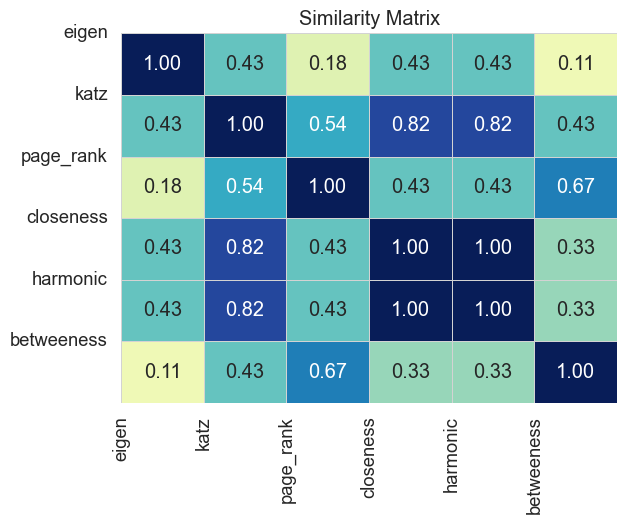

In [98]:
sns.set(font_scale=1.2)
sns.heatmap(calculate_similarity_matrix(top_10_nodes_dict), annot=True, fmt=".2f", cmap="YlGnBu", cbar=False,
            center=0.5, linewidths=0.5, linecolor='lightgray')
plt.title("Similarity Matrix")
plt.xticks(np.arange(len(top_10_nodes_dict)), list(top_10_nodes_dict.keys()), rotation=90)
plt.yticks(np.arange(len(top_10_nodes_dict)), list(top_10_nodes_dict.keys()), rotation=0)
plt.show()

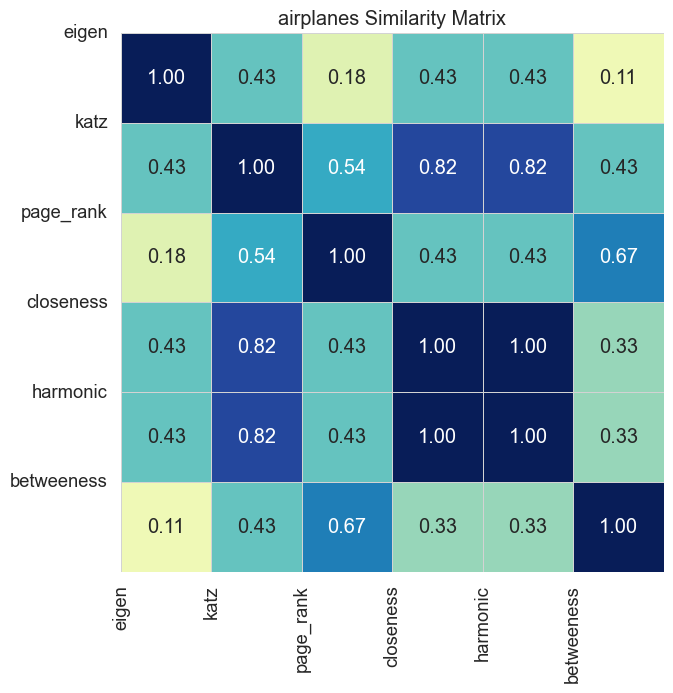

In [102]:
plot_similarity_heatmap(calculate_similarity_matrix(top_10_nodes_dict), 'airplanes')

### 1.4

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


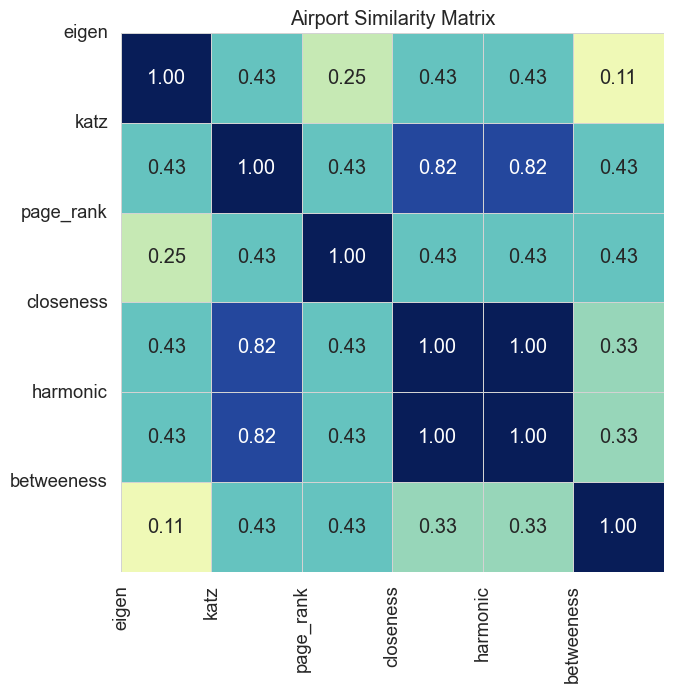

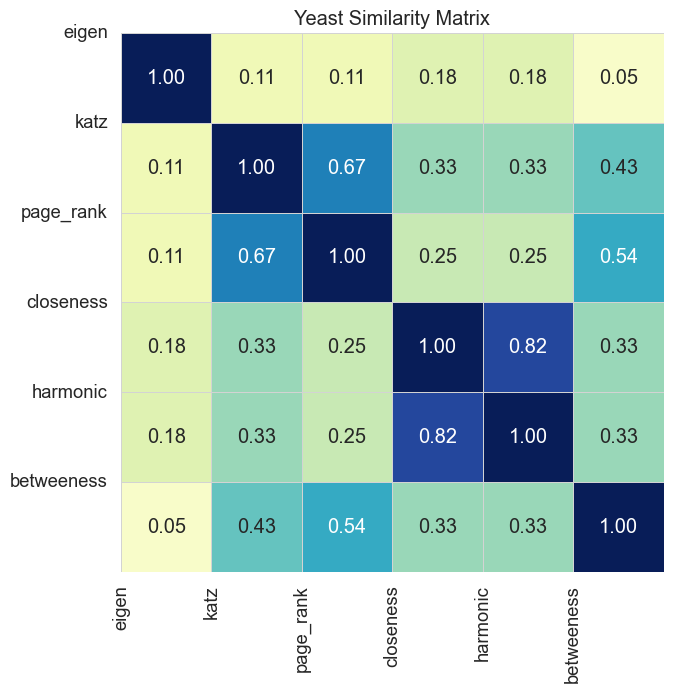

In [226]:
# Load the networks
G_airport, G_yeast = load_graphs()

# Get the top nodes
top_airport_nodes = top_10_nodes(G_airport)
top_yeast_nodes = top_10_nodes(G_yeast)

# Generate the similarity matrcies
node_similarity_airport = calculate_similarity_matrix(top_airport_nodes)
node_similarity_yeast = calculate_similarity_matrix(top_yeast_nodes)

# Generate the heatmaps
plot_similarity_heatmap(node_similarity_airport, 'Airport', save=True)
plot_similarity_heatmap(node_similarity_yeast, 'Yeast', save=True)


## Written Response for 1.4

Answer: for the airport data I think the betweenness centrality would be the most relevant for this network because the importance of a node relates to whether that node is in the route of transfers and this is important because we would easily be able to identify certain airports as hubs. For the yeast data, betweenness centrality can provide insights into the importance of operons in facilitating communication and information flow between different parts of the network.

# Part 2: Community Detection with Zachary’s Karate Club [25 points]

### 2.1

In [136]:
karate = nx.karate_club_graph()
nodes = list(karate.nodes())
comms = list(nx.community.k_clique_communities(karate, 3))
communities = []
for comm in comms:
    communities.append(list(comm))
    
communities

[[0,
  1,
  2,
  3,
  7,
  8,
  12,
  13,
  14,
  15,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33],
 [0, 4, 5, 6, 10, 16],
 [24, 25, 31]]

In [137]:
comm_assignments = [None] * len(nodes)
for i, comm in enumerate(communities):
    for j, node in enumerate(nodes):
        if node in comm:
            if comm_assignments[j] is None:
                comm_assignments[j] = i
            else:
                comm_assignments[j] = len(comms)

for i,x in enumerate(comm_assignments):
    if comm_assignments[i] is None:
        comm_assignments[i] = -1
comm_assignments

[3,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 -1,
 1,
 -1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 2,
 0,
 0,
 0,
 0,
 0,
 3,
 0,
 0]

In [144]:
color_map = {1: 'blue', 2: 'green', 0: 'red', -1: 'yellow', 3:'orange'}
[color_map[i] for i in comm_assignments]

['orange',
 'red',
 'red',
 'red',
 'blue',
 'blue',
 'blue',
 'red',
 'red',
 'yellow',
 'blue',
 'yellow',
 'red',
 'red',
 'red',
 'red',
 'blue',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'green',
 'green',
 'red',
 'red',
 'red',
 'red',
 'red',
 'orange',
 'red',
 'red']

In [138]:
compute_cfinder_communities(karate, 3)

[3,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 -1,
 1,
 -1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 2,
 0,
 0,
 0,
 0,
 0,
 3,
 0,
 0]

In [111]:
list(comms[0])

[0, 1, 2, 3, 7, 13]

In [114]:
list(karate.nodes())

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33]

In [104]:
nx.density(nx.karate_club_graph())

0.13903743315508021

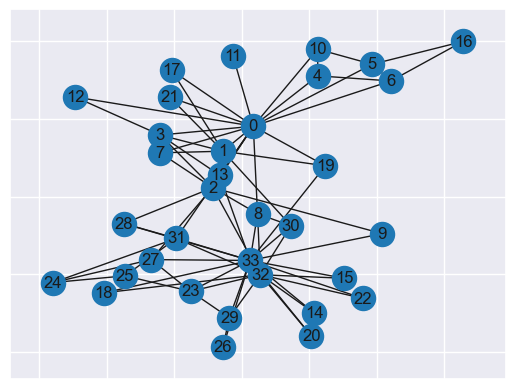

In [108]:
nx.draw_networkx(karate, with_labels=True)

In [213]:
def get_community_assignments(nodes, comms):
    comm_assignments = [None] * len(nodes)
    for i, comm in enumerate(comms):
        for j, node in enumerate(nodes):
            if node in comm:
                if comm_assignments[j] is None:
                    comm_assignments[j] = i
                else:
                    comm_assignments[j] = len(comms)

    for i,x in enumerate(comm_assignments):
        if comm_assignments[i] is None:
            comm_assignments[i] = -1
            
    return comm_assignments


def compute_cfinder_communities(G, k):
    """
    Inputs: G: NetworkX Graph Object

    Returns:
    community_assignments: list[int]
    """
    
    nodes = list(G.nodes())
    comms = list(nx.community.k_clique_communities(G, k))
    community_assignments = get_community_assignments(nodes, comms)

    return community_assignments

def compute_greedy_communities(G, mu=1):
    """
    Inputs: G: NetworkX Graph Object

    Returns:
    community_assignments: list[int]
    """
    
    nodes = list(G.nodes())
    comms = list(nx.community.greedy_modularity_communities(G, resolution=mu))
    community_assignments = get_community_assignments(nodes, comms)


    return community_assignments
    

def compute_louvain_communities(G, mu=1):
    """
    Inputs: G: NetworkX Graph Object

    Returns:
    community_assignments: list[int]
    """
    
    nodes = list(G.nodes())
    comms = list(nx.community.louvain_communities(G, resolution=mu))
    community_assignments = get_community_assignments(nodes, comms)


    return community_assignments


### 2.2

In [175]:
def plot_network_communities(G, community_assignments, algorithm_name, save=False):
    """
    Inputs:
    G: NetworkX Graph Object
    community_assignments: list[int]
    algorithm_name: str
    """
    random.seed(1)
    np.random.seed(1)
    
    plt.figure(figsize=(5, 5))
    
    color_map = {0: 'blue', 1: 'green', 2: 'red', 3: 'orange', -1:'yellow'}
    node_colors = [color_map[community_assignments[i]] for i,node in enumerate(G.nodes())]

    pos = nx.spring_layout(G)  # Layout for node positioning
    nx.draw_networkx(G, pos, node_color=[color_map[i] for i in community_assignments], with_labels=True)
    plt.title(f"{algorithm_name} Communities")
    
    red_patch = mpatches.Patch(color='red', label='comm3')
    blue_patch = mpatches.Patch(color='blue', label='comm1')
    green_patch = mpatches.Patch(color='green', label='comm2')
    orange_patch = mpatches.Patch(color='orange', label='multi-assigned')
    yellow_patch = mpatches.Patch(color='yellow', label='unassigned')

    plt.legend(handles=[blue_patch, green_patch, red_patch, orange_patch, yellow_patch])

    plt.show()
    if save:
        plt.savefig(f'karate_communities_{algorithm_name}.png')
    plt.close()

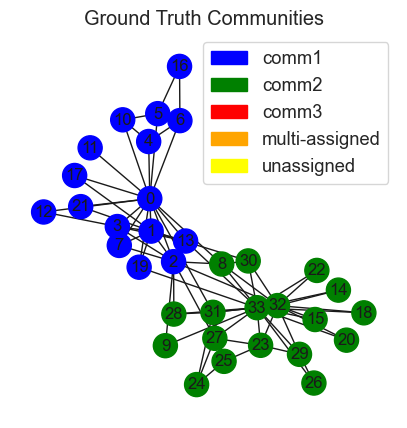

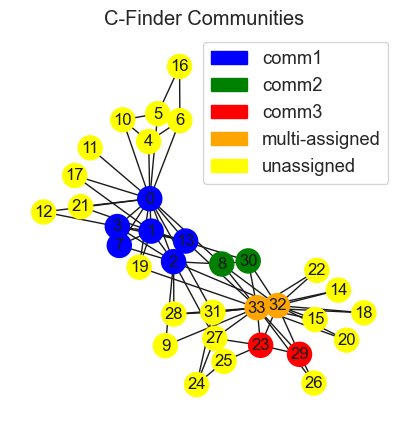

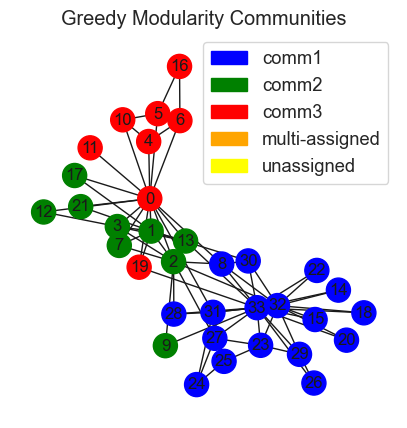

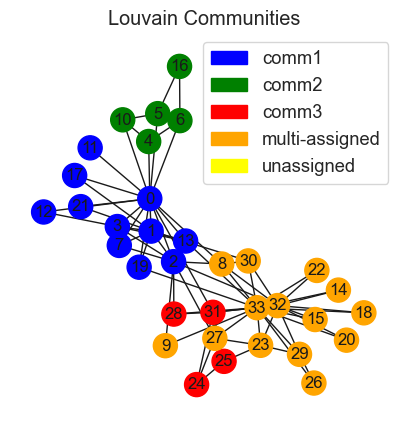

In [225]:
G = nx.karate_club_graph()
ground_truth = [0, 0, 0, 0, 0, 
                0, 0, 0, 1, 1, 
                0, 0, 0, 0, 1, 
                1, 0, 0, 1, 0, 
                1, 0, 1, 1, 1,
                1, 1, 1, 1, 1,
                1, 1, 1, 1]



# Chose a reasonable value for k in the cfinder algorithm 
cfinder_assignments = compute_cfinder_communities(G, k=4)
greedy_assignments = compute_greedy_communities(G)
louvain_assignments = compute_louvain_communities(G)


# Compare resulting community assignments with the ground truth
plot_network_communities(G, ground_truth, 'Ground Truth', save=True)
plot_network_communities(G, cfinder_assignments, 'C-Finder', save=True)
plot_network_communities(G, greedy_assignments, 'Greedy Modularity', save=True)
plot_network_communities(G, louvain_assignments, 'Louvain', save=True)


## Written Response for 2.3

Answer: Greed modularity communities performed decent relative to the ground truth labels. It got most of the bottom community correct but split the top community into two separate communities. Cfinder communities performed the worst as it only labeled a few nodes in actual communities and the majority of nodes were unassigned

# Part 3: Community Detection with LFR Networks [25 points]

### 3.1

In [181]:
from networkx.generators.community import LFR_benchmark_graph

n = 500
tau1 = 2.5
tau2 = 2
min_degree = 3
min_community = 40
seed = 10

G = LFR_benchmark_graph(
    n=500, tau1=2.5, tau2=2, mu=0.5, min_degree=3, min_community=40, seed=10
)

In [205]:
communities = []
for node in G.nodes(data=True):
    communities.append(set(node[1]['community']))

unique_list = []
 
# traverse for all elements
for x in communities:
    # check if exists in unique_list or not
    if x not in unique_list:
        unique_list.append(x)

comm_dict = {}
for i, n in enumerate(unique_list):
    comm_dict[i] = n
    
key_list = list(comm_dict.keys())
val_list = list(comm_dict.values())

comm_assignment = []
for node in G.nodes(data=True):
    position = val_list.index(node[1]['community'])
    comm_assignment.append(key_list[position])

comm_assignment

[0,
 1,
 2,
 1,
 2,
 3,
 4,
 5,
 5,
 0,
 6,
 7,
 3,
 3,
 8,
 5,
 2,
 0,
 7,
 2,
 7,
 0,
 7,
 2,
 6,
 8,
 0,
 4,
 0,
 3,
 0,
 8,
 7,
 0,
 2,
 1,
 2,
 0,
 3,
 1,
 3,
 0,
 3,
 3,
 7,
 6,
 6,
 7,
 6,
 7,
 0,
 6,
 4,
 8,
 3,
 0,
 1,
 5,
 4,
 6,
 5,
 7,
 8,
 1,
 3,
 0,
 1,
 0,
 3,
 0,
 7,
 7,
 3,
 6,
 0,
 8,
 8,
 8,
 7,
 6,
 0,
 8,
 5,
 1,
 0,
 5,
 5,
 1,
 7,
 1,
 4,
 1,
 3,
 5,
 5,
 4,
 1,
 4,
 1,
 0,
 1,
 1,
 3,
 1,
 8,
 2,
 0,
 1,
 7,
 7,
 0,
 8,
 8,
 8,
 4,
 7,
 0,
 7,
 3,
 2,
 1,
 3,
 2,
 2,
 4,
 7,
 5,
 8,
 5,
 2,
 8,
 4,
 4,
 2,
 4,
 2,
 0,
 7,
 3,
 3,
 3,
 0,
 0,
 2,
 8,
 0,
 4,
 2,
 2,
 8,
 3,
 0,
 8,
 0,
 6,
 6,
 8,
 5,
 6,
 8,
 6,
 6,
 8,
 1,
 7,
 3,
 8,
 1,
 8,
 2,
 7,
 4,
 4,
 4,
 4,
 1,
 6,
 8,
 0,
 1,
 6,
 4,
 0,
 7,
 2,
 6,
 1,
 3,
 4,
 8,
 8,
 6,
 4,
 0,
 7,
 3,
 1,
 6,
 5,
 4,
 4,
 1,
 1,
 6,
 5,
 3,
 5,
 7,
 5,
 0,
 6,
 4,
 8,
 3,
 0,
 6,
 3,
 2,
 2,
 4,
 5,
 1,
 6,
 6,
 4,
 1,
 7,
 7,
 3,
 7,
 2,
 2,
 4,
 1,
 5,
 6,
 8,
 2,
 3,
 7,
 0,
 6,
 2,
 5,
 0,
 6,
 2,
 2,
 8,
 0,


In [198]:
G.nodes(data=True)

NodeDataView({0: {'community': {0, 136, 9, 266, 141, 142, 270, 272, 273, 145, 403, 17, 405, 21, 407, 280, 281, 282, 153, 284, 28, 30, 415, 26, 33, 288, 420, 37, 295, 41, 298, 427, 300, 305, 178, 50, 308, 182, 439, 55, 316, 65, 193, 67, 450, 69, 326, 455, 325, 74, 80, 465, 209, 338, 84, 341, 214, 472, 474, 99, 106, 110, 240, 244, 116, 374, 151, 249}}, 1: {'community': {1, 3, 289, 290, 291, 35, 39, 296, 299, 301, 304, 310, 56, 63, 66, 83, 340, 87, 89, 91, 96, 354, 98, 100, 101, 103, 107, 367, 370, 120, 381, 385, 391, 417, 163, 167, 426, 175, 179, 186, 443, 444, 452, 453, 454, 196, 201, 202, 476, 221, 225, 485, 487, 489, 233}}, 2: {'community': {256, 257, 2, 4, 16, 19, 23, 34, 36, 105, 119, 375, 122, 378, 123, 129, 388, 133, 390, 135, 143, 402, 147, 148, 410, 169, 440, 184, 469, 471, 217, 218, 480, 230, 231, 492, 237, 497, 242, 499, 246, 247}}, 3: {'community': {1, 3, 289, 290, 291, 35, 39, 296, 299, 301, 304, 310, 56, 63, 66, 83, 340, 87, 89, 91, 96, 354, 98, 100, 101, 103, 107, 367, 370

In [207]:
from networkx.generators.community import LFR_benchmark_graph

# Generating the LFR Benchmark Network
def generate_lfr_benchmark(mu):
    """
    Inputs:
    mu: float

    Returns:
    G: NetworkX Graph Object
    community_assignments: list[int]
    """
    
    n = 500
    tau1 = 2.5
    tau2 = 2
    min_degree = 3
    min_community = 40
    seed = 10
    
    G = LFR_benchmark_graph(
        n=500, tau1=2.5, tau2=2, mu=mu, min_degree=3, min_community=40, seed=10
    )
    
    communities = []
    for node in G.nodes(data=True):
        communities.append(set(node[1]['community']))

    unique_list = []

    # traverse for all elements
    for x in communities:
        # check if exists in unique_list or not
        if x not in unique_list:
            unique_list.append(x)

    comm_dict = {}
    for i, n in enumerate(unique_list):
        comm_dict[i] = n

    key_list = list(comm_dict.keys())
    val_list = list(comm_dict.values())

    community_assignments = []
    for node in G.nodes(data=True):
        position = val_list.index(node[1]['community'])
        community_assignments.append(key_list[position])

    return G, community_assignments


### 3.2

In [210]:
def normalized_mutual_information(y_true, y_pred):
    """
    Inputs:
    y_true: list[int]
    y_pred: list[int]

    Returns:
    NMI: float
    """
    
    communities_true = np.array(y_true)
    communities_pred = np.array(y_pred)

    num_nodes = len(communities_true)

    mutual_info = 0.0
    for true_label in set(communities_true):
        for pred_label in set(communities_pred):
            intersection = np.sum((communities_true == true_label) & (communities_pred == pred_label))
            
            p_true = np.sum(communities_true == true_label) / num_nodes
            p_pred = np.sum(communities_pred == pred_label) / num_nodes
            
            if intersection > 0:
                mutual_info += intersection / num_nodes * np.log((intersection / num_nodes) / (p_true * p_pred))

    e_true = -np.sum([(np.sum(communities_true == label) / num_nodes) * np.log(np.sum(communities_true == label) / num_nodes) for label in set(communities_true)])
    e_pred = -np.sum([(np.sum(communities_pred == label) / num_nodes) * np.log(np.sum(communities_pred == label) / num_nodes) for label in set(communities_pred)])

    NMI = 2 * mutual_info / (e_true + e_pred)

    return NMI

### 3.3

In [218]:
def sweep_mu_values():
    """
    
    Returns:
    greedy_nmis: list[float]
    louvain_nmis: list[float]
    
    """
    
    mu_values = np.linspace(0.1, 1.0, num=10)
    greedy_nmis = []
    louvain_nmis = []

    for mu in mu_values:
        G, ground_truth_communities = generate_lfr_benchmark(mu)
        communities_modularity = compute_greedy_communities(G, mu=mu)
        nmi_modularity = normalized_mutual_information(ground_truth_communities, communities_modularity)
        greedy_nmis.append(nmi_modularity)

        communities_louvain = compute_louvain_communities(G, mu=mu)
        nmi_louvain = normalized_mutual_information(ground_truth_communities, communities_louvain)
        louvain_nmis.append(nmi_louvain)


    return greedy_nmis, louvain_nmis

### 3.4

In [216]:
def plot_nmi_values(greedy_nmis, louvain_nmis, save=False):
    """
    Inputs:
    greedy_nmis: list[int]
    louvain_nmis: list[int]
    """
    
    mu_values = np.linspace(0.1, 1.0, num=10)
    plt.figure(figsize=(8,6))

    plt.plot(mu_values, greedy_nmis, label='Modularity Maximization')
    plt.plot(mu_values, louvain_nmis, label='Louvain')
    plt.xlabel('mu')
    plt.ylabel('NMI')
    plt.title('NMI Values for Modularity Maximization and Louvain')
    plt.legend()


    plt.show()
    
    if save:
        plt.savefig('3_4.png')
    plt.close()

### 3.5

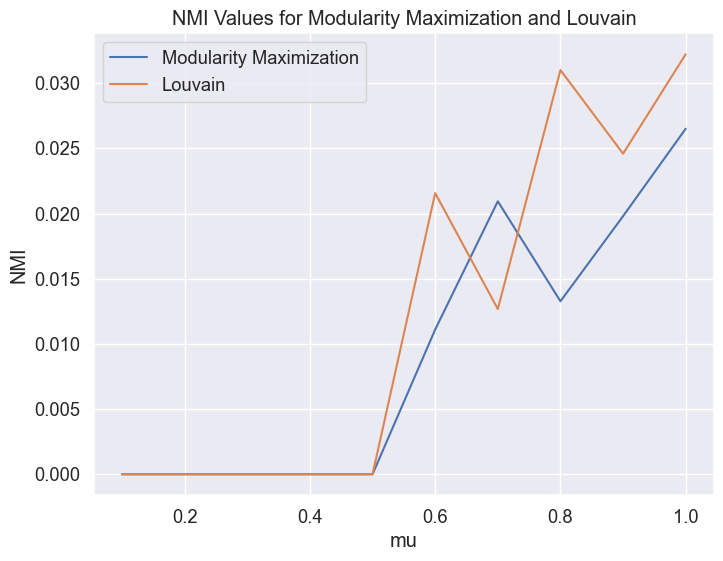

In [227]:
greedy_nmis, louvain_nmis = sweep_mu_values()

plot_nmi_values(greedy_nmis, louvain_nmis, save=True)

## Written Response for 3.5

Answer: the trend for both algorithms is increasing as mu increases, with a slight dip when mu reaches 0.7 or 0.8. The louvain trends slightly higher than modularity maximization. NMI is a measure of similarity between two sets of community assignments. As mu varies, it affects the resolution of the community detection algorithm, which can in turn impact the resulting community assignments and their agreement with each other.

# Part 4: Community Detection on Real World Data [15 points]

### 4.1

In [220]:
def calculate_community_sizes(G):
    """
    Inputs:
    G: NetworkX Graph Object

    Returns: 
    greedy_sizes: list[int]
    louvain_sizes: list[int]
    """
    
    greedy_communities = list(nx.community.greedy_modularity_communities(G))
    greedy_sizes = [len(community) for community in greedy_communities]

    louvain_communities = list(nx.community.louvain_communities(G))
    louvain_sizes = [len(community) for community in louvain_communities]


    return greedy_sizes, louvain_sizes

### 4.2

In [231]:
def plot_community_size_distributions(greedy_sizes, louvain_sizes, data_name, save=False):
    """
    Inputs:
    greedy_sizes: list[int]
    louvain_sizes: list[int]
    data_name: str
    """

    plt.figure(figsize=(8,6))
    
    plt.hist(greedy_sizes, bins='auto', alpha=0.5, label='Modularity Maximization')
    plt.hist(louvain_sizes, bins='auto', alpha=0.5, label='Louvain')

    plt.title(f'Community Size Distributions - {data_name}')
    plt.xlabel('Community Size')
    plt.ylabel('Frequency')

    plt.legend()


    plt.show()
    
    if save:
        plt.savefig('4_2.png')
    plt.close()
    

### 4.3

In [230]:
G_airport, G_yeast = load_graphs()

# Airport
greedy_sizes, louvain_sizes = calculate_community_sizes(G_airport)
plot_community_size_distributions(greedy_sizes, louvain_sizes, 'Airport', save=True)

# Yeast
greedy_sizes, louvain_sizes = calculate_community_sizes(G_yeast)
plot_community_size_distributions(greedy_sizes, louvain_sizes, 'Yeast', save=True)

## Written Response for 4.3

Answer: For the yeast data, the community size distributions for both algorithms are pretty similar, with modularity maximization having slightly more smaller communities and slightly more larger communities on the far ends of each spectrum. For the airport data, the louvain community size distribution is more spread out while modularity maximization produced mostly very small communities

## Response for 5



### Partition 1:

Image:

Modularity:

### Partition 2:

Image:

Modularity:

### Partition 3:

Image:

Modularity:

### Partition 4:

Image:

Modularity: